# <b> active-pynference </b> : mazeX demo

Hello you ! This is a quick demo of the <b>active-pynference</b> / <b>actynf</b> package to simulate MDPs using Sophisticated Inference ! 
Buckle up buckaroo !


## 1. Introducing the task

To demonstrate the ability of the Sophisticated Inference agent to solve complex environments with numerous latent states, we will study a typical use case of the SI algorithm : the "soft maze".

Let's picture a grid made of a number of discrete cells :

![starting_situation.png](local_resources/tmaze/starting_situation.png)

This maze consists in two objects (here : a cheese and a mousetrap) that are either on the left or the right branch. The initial position of those objects is determined by the experimenter (you !). Formally, we can note $s_1$ the state relative to the position of the cheese (either left or right). The initial position of the cheese is determined by the following probability distribution : $D_1 = [p_{init},1-p_{init}]$ and will not change during a trial.

The mouse may be in four different places : on its starting position (0),on the bottom of the maze (1), on the left(2) or on the right (3). Let's call this second state $s_2$. Initially, the value of $s_2$ is always 0.

The mouse always wants to get to observe cheese as fast as possible and wants to stay away from observing the mousetrap. How much the mouse is looking after the reward and how much it fears the trap is fixed by the experimenter through preference parameters called *reward seeking* (rs)  and *loss aversion* (la).

**Note :** To discourage greedy mouses, once it has picked either left or right, it is stuck for the remainder of the trial. Therefore, the mouse only has one chance at guessing where the cheese is.

This wouldn't be a very interesting setup if we didn't add another dimension to the task : the clue. If the mouse chooses to get to the bottom of the maze, it will receive a clue. Although this clue has no extrinsic reward, it may (or may not) contain some relevant information regarding the position of the cheese. For example, if the clue is good, it will indicate reliably a certain value if the cheese is left and another if the cheese is right.If its not, the observation it provides the mouse will have no correlation with the position of the cheese whatsoever, making it useless. We can picture those clue observation values as arrows pointing towards the right or the left : 

Reliable clue                           | Unreliable clue                     
:--------------------------------------:|:------------------------------------:
![](local_resources/tmaze/goodclue.gif) |![](local_resources/tmaze/badclue.gif)

The point of this task is to explore how various parameters such as the mouse initial perception of the task or the environmental dynamics may affect its behaviour : *Should I get the clue,resolving uncertainty but differing my reward ? Should I risk going for the cheese even if I'm not sure about its position ? How good is the clue ?*

Casper Hesp and colleagues made this nice rendition of the paradigm (replace food with cheese and shock with mousetrap):

![](local_resources/tmaze/tmaze_article_figure_hesp.png)

<sub><sup>(**Source :** Hesp, Casper & Smith, Ryan & Parr, Thomas & Allen, Micah & Friston, Karl & Ramstead, Maxwell. (2019). Deeply Felt Affect: The Emergence of Valence in Deep Active Inference. 10.31234/osf.io/62pfd.)</sub></sup>

On the next part of this tutorial , we'll see how to simulate various mouse behaviours using *active_pynference*.

## 2 . Using the package

### a. Install the package & import the needed packages 
<sup><sub><b> active-pynference </b> requires Python 3.x. and has been tested for Python 3.11 + but probably works well enough with slightly older versions.</sub></sup>

You can install the package by running :

```
    pip install active-pynference
```

You can find more complete documentation regarding the package installation in the installation_instructions.ipynb file.

Now that the package is successfully installed, let's explore what we can do with it !

In [1]:
# First, let's import stuff !
# Python "classics": 
import os
import numpy as np
import matplotlib.pyplot as plt


# Active Inference based packages :
import actynf # import active-pynference package
print("Imported active-pynference - version " + actynf.__version__)

Imported active-pynference - version 0.1.32


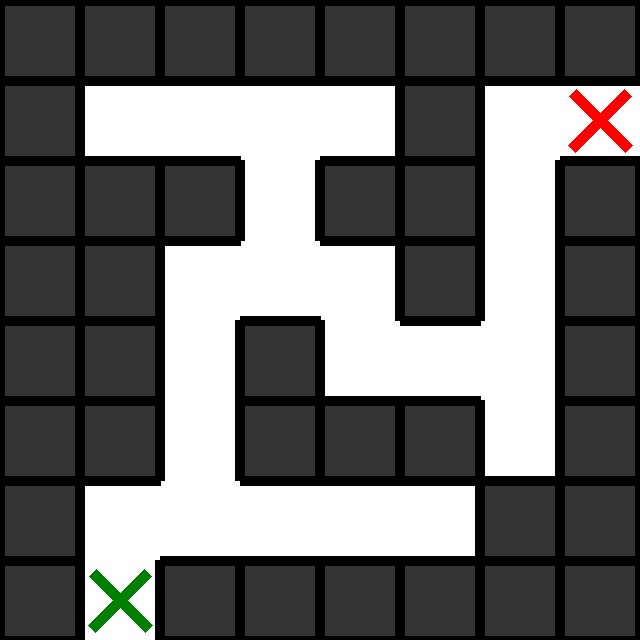

In [2]:
from demo_draft.maze_x import build_maze,build_maze_model
from demo_draft.maze_x import mazeplot

# This is the maze we're working with !
MAZE_ARRAY = np.array([
    [1,1,1,1,1,1,1,1],
    [1,0,0,0,0,0,0,1],
    [1,1,1,0,1,1,0,1],
    [1,1,0,0,0,1,0,1],
    [1,1,0,1,0,0,0,1],
    [1,1,0,1,1,1,0,1],
    [1,0,0,0,0,0,0,1],
    [1,0,1,1,1,1,1,1]
])
MAZE_ARRAY = np.array([
    [1,1,1,1,1,1,1,1],
    [1,0,0,0,0,1,0,0],
    [1,1,1,0,1,1,0,1],
    [1,1,0,0,0,1,0,1],
    [1,1,0,1,0,0,0,1],
    [1,1,0,1,1,1,0,1],
    [1,0,0,0,0,0,1,1],
    [1,0,1,1,1,1,1,1]
])
START_IDX = (7,1)
END_IDX = (1,7)

# The traditional Active Inference 
# HMM associated with the maze below !
A,B,C,D,E,U = build_maze(MAZE_ARRAY,START_IDX,END_IDX)  

# Show the environment explored by the subject
maze_img = mazeplot(MAZE_ARRAY,START_IDX,END_IDX)
display(maze_img)

Above : the environment our agents will evolve in : 
- **The filled cells** are "adversive cells", the agents tries to avoid moving through them
- **The green cross** is the starting position of the agent
- **The red cross** is the goal of the agent. This preference can be encoded either through a preference only at this particular position (I highly value this specific spot but i don't value the spots directly next to it at all), or through a gradient of preferences based on the distance between each cell and this goal. To pick what kind of preference the subject starts with, you can use the *dirac_goal* boolean parameter in the model building function !

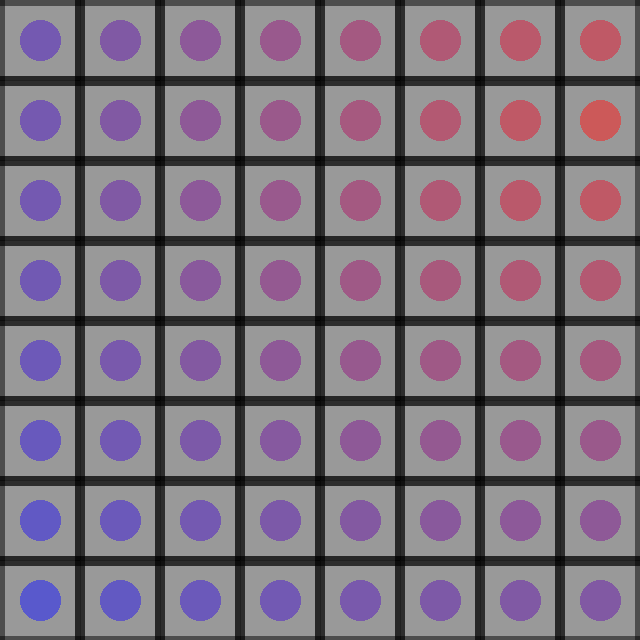

In [3]:
# The model entertained by the subject :
dirac_goal = False
a,b,c,d,e,u = build_maze_model(MAZE_ARRAY,START_IDX,END_IDX,
                               initial_tile_confidence=1.0,dirac_goal=dirac_goal)

#Show the initial model entertained by the subject
model_img = mazeplot(MAZE_ARRAY,START_IDX,END_IDX,
        t=0,
        x_d=None,o_d=None,u_d=None,
        a=a,b=None,c=c,d=None,e=None,
        show_start_and_stop=False)
display(model_img)

Above : The initial model entertained by our agents : 
- **Background :** initial belief about where the "adversive cells" are. The darker the cell, the more the agent believes it "contains" an adversive stimulus. This will evolve across trials through agent learning !
- **Foreground :** Prior preferences of the agents. Bluer cells generate less sought after outcomes and red cells generate outcomes that the agent will look for. Try changing the *dirac_goal* parameter to see how it affects the preferences of the agent !

### b. Initial simulations

The active-pynference package relies on a generic component to build both subject environments and models. This generic component is the <i> layer </i>.
Let's import it using :

 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-0;2-0])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-1;2-1])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-2;2-2])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-3;2-3])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-4;2-4])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-5;2-5])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-6;2-6])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-7;2-7])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-8;2-8])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-9;2-9])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-10;2-10])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-11;2-11])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-12;2-12])
 Netwo

c:\Users\annic\OneDrive\Bureau\MainPhD\code\ActivPynference_Public\demos\demo_draft\maze_x.py:570: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


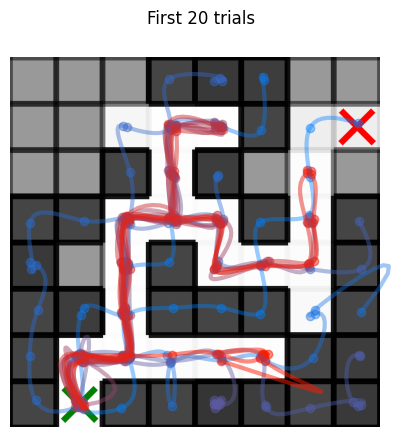

: 

In [4]:
from demo_draft.maze_x import several_trajectory_learning_plots,all_trajectories_plots

# several_trajectory_learning_plots(MAZE_ARRAY,START_IDX,END_IDX,
#                         dirac_goal=False,alpha=3)

all_trajectories_plots(MAZE_ARRAY,START_IDX,END_IDX,
                        dirac_goal=False,alpha=3,rs=0.3)

In *actynf*, the **mdp_layer** is a generic Python class that can be used to compute observations from states and actions (a generative process) as well as infer states and actions from observations and model variables (a generative model). All the user has to do to differentiate between those behaviours is to specify it in the constructor.

Let's build the environment for our T-maze example :